
# K-Means Clustering Exercise
## Larry Larkin


In [1]:
from sklearn.cluster import KMeans  #algorithm in sklearn library to do k-means clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

%matplotlib inline

In [2]:
#Load in the "box" of items that belong to the CC data
filepath = "Datasets/CC GENERAL.csv"
CC_box = pd.read_csv(filepath)
CC_box.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
#Check for missing values in the data
CC_box.count()

CUST_ID                             8950
BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8949
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8637
PRC_FULL_PAYMENT                    8950
TENURE                              8950
dtype: int64

## Features that will be analyzed are:
    BALANCE
    PURCHASES
    CREDIT LIMIT
    PAYMENTS


In [4]:
#Drop all other columns
CCdf = CC_box.drop(['CUST_ID','BALANCE_FREQUENCY','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE'], axis=1)

In [5]:
#Verify columns were dropped.
CCdf.head()

,BALANCE,PURCHASES,CREDIT_LIMIT,PAYMENTS
0,40.900749,95.40,1000.0,201.802084
1,3202.467416,0.00,7000.0,4103.032597
2,2495.148862,773.17,7500.0,622.066742
3,1666.670542,1499.00,7500.0,0.000000
4,817.714335,16.00,1200.0,678.334763


In [6]:
#Verify dimensions
CCdf.shape

(8950, 4)

In [7]:
CCdf.isna().sum()

BALANCE         0
PURCHASES       0
CREDIT_LIMIT    1
PAYMENTS        0
dtype: int64

In [8]:
#Drop row with NA value
#drop rows with any missing data
CCdf_clean = CCdf.dropna()
CCdf_clean.isna().sum()

BALANCE         0
PURCHASES       0
CREDIT_LIMIT    0
PAYMENTS        0
dtype: int64

In [9]:
CCdf_clean.shape

(8949, 4)

In [10]:
#X is the dataframe containing predictive features
X=CCdf_clean

In [11]:
#initialize the k-means algorithm
#setting it to find 3 clusters (category groups)
kmeans = KMeans(n_clusters=3)

In [12]:
#teach the model where the data points are
#calculates centroids
#classifes data points to a cluster depending on closest centroid
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
#data point coordinates for centroids of each cluster
#each line is a cluster

#index 0 is Cluster 0
#index 1 is Cluster 1
#index 2 is Cluster 2
print(kmeans.cluster_centers_)

[[  885.5429282    591.93602785  2638.47720794  1009.12363511]
 [ 3180.58761372  1574.79703428  8950.07510045  2727.20703519]
 [ 4716.45806891 10165.03345588 12408.45588235 18078.98476321]]


Text(0, 0.5, 'Credit Limit')

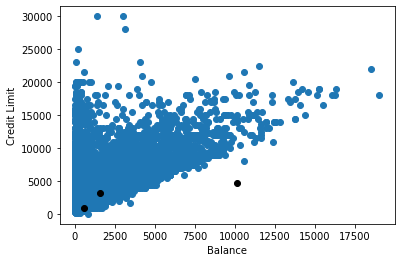

In [15]:
#scatterplot of Balance and Credit Limit with k-means calculated centroids

#clusters of original features based on original category
plt.scatter(CCdf_clean['BALANCE'], CCdf_clean['CREDIT_LIMIT'], cmap='rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0], c='black')

plt.xlabel('Balance')
plt.ylabel('Credit Limit')

Text(0, 0.5, 'Payments')

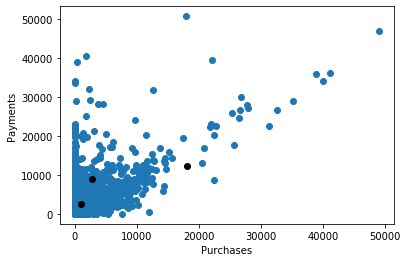

In [16]:
#scatterplot of Purchases and Payments with k-means calculated centroids

#clusters of original features based on original category
plt.scatter(CCdf_clean['PURCHASES'], CCdf_clean['PAYMENTS'], cmap='rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,3], kmeans.cluster_centers_[:,2], c='black')

plt.xlabel('Purchases')
plt.ylabel('Payments')

In [17]:
CCdf_clean['CLUSTERS'] = kmeans.labels_
CCdf_clean.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,BALANCE,PURCHASES,CREDIT_LIMIT,PAYMENTS,CLUSTERS
0,40.900749,95.40,1000.0,201.802084,0
1,3202.467416,0.00,7000.0,4103.032597,1
2,2495.148862,773.17,7500.0,622.066742,1
3,1666.670542,1499.00,7500.0,0.000000,1
4,817.714335,16.00,1200.0,678.334763,0
5,1809.828751,1333.28,1800.0,1400.057770,0
6,627.260806,7091.01,13500.0,6354.314328,1
7,1823.652743,436.20,2300.0,679.065082,0
8,1014.926473,861.49,7000.0,688.278568,1
9,152.225975,1281.60,11000.0,1164.770591,1


Text(0, 0.5, 'Credit Limit')

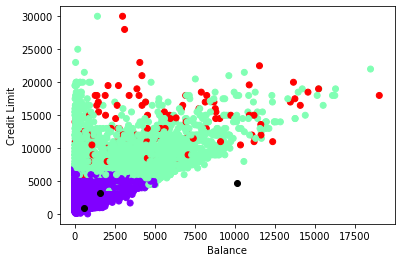

In [19]:
#Scatterplot of Balance and Credit Limit 
#Predicted cluster group with k-means calculated centroids

#clusters of original features based on original category
plt.scatter(CCdf_clean['BALANCE'], CCdf_clean['CREDIT_LIMIT'], c=CCdf_clean['CLUSTERS'], cmap='rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0], c='black')

plt.xlabel('Balance')
plt.ylabel('Credit Limit')

Text(0, 0.5, 'Payments')

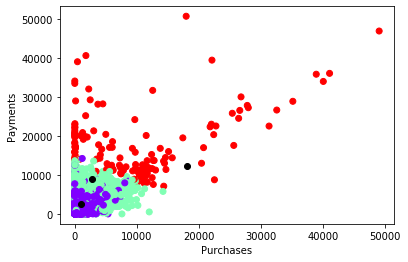

In [20]:
#Scatterplot of Purchases and Payments 
#Predicted cluster group with k-means calculated centroids

#clusters of original features based on original category
plt.scatter(CCdf_clean['PURCHASES'], CCdf_clean['PAYMENTS'], c=CCdf_clean['CLUSTERS'], cmap='rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,3], kmeans.cluster_centers_[:,2], c='black')

plt.xlabel('Purchases')
plt.ylabel('Payments')